In [1]:
# packages to store and manipulate data
import pandas as pd
import numpy as np
import pickle

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# model building package
import sklearn

# package to clean text
import re

In [2]:
with open('kp_all_sentiments_translations.pickle', "rb") as f:
    tweets = pickle.load(f)

In [174]:
#Set up a dataframe of user IDs in tweets over time to do calculations
date = tweets["datetime"]
ID = tweets["user_id"]
users_df = pd.DataFrame(list(zip(date, ID)), columns =['Date', 'User_ID']) 
users_df["tweets_per_user_count"] = 1
users_df = users_df.groupby(["User_ID"]).sum()
users_df = users_df.reset_index()
datetime = tweets[["user_id", "datetime"]]
users = users_df.merge(datetime, left_on = "User_ID", right_on = "user_id", how="inner")
users = users.drop(columns = ["User_ID", "tweets_per_user_count"])
users["datetime"] = pd.to_datetime(users["datetime"])

In [247]:
#Run a for loop over users to calcualte the standard deviation of the distribution of the time between their tweets
std = []

for user in pd.unique(users['user_id']):
    new_df = users[users["user_id"]==user]
    new_df = new_df.sort_values("datetime")
    new_df['delta'] = new_df["datetime"].diff().astype('timedelta64[m]')
    print(new_df["delta"].std())
    std.append(new_df["delta"].std())

In [282]:
#Create dataframe of standard deviations
std_df = pd.DataFrame(std)

In [283]:
#Create dataframe of unique user ids
uid = pd.DataFrame(users["user_id"].unique())

In [284]:
#Merge dataframes
result = uid.merge(std_df, left_index=True, right_index=True)
result.columns = ["user_id", "std"]

In [285]:
#Save results
with open("std_of_kp_tweet_timing.pickle", "wb") as f:
    pickle.dump(result, f)

In [306]:
#Create for loop to loop over unique users to get their average tweets per day

tweets_per_day = []

for user in pd.unique(users['user_id']):
    new_df = users[users["user_id"]==user]
    new_df = new_df.sort_values("datetime")
    delta = new_df["datetime"].max() - new_df["datetime"].min()
    delta = pd.to_timedelta([delta]).astype('timedelta64[D]')[0]
    daily_tweets = (len(new_df)) / delta
    print(daily_tweets)
    tweets_per_day.append(daily_tweets)

0.9297395517867959
0.15821501014198783
0.8955661414437522
0.0863905325443787
0.4897025171624714
0.17094017094017094
0.34134134134134136
0.14792899408284024
0.04961832061068702
0.17165354330708663
0.07344028520499109
0.22063666300768386
0.09419152276295134
0.035942492012779555
0.07780979827089338
0.2796296296296296
0.2631578947368421
2.094650205761317
0.13414634146341464
2.142570281124498
0.23524590163934425
0.4126055880441845
0.22263513513513514
0.011087420042643924
0.04588235294117647
0.13738019169329074
0.2210144927536232
0.09649122807017543
0.6045816733067729
0.15160349854227406
0.05492730210016155
0.3106796116504854
0.11299435028248588
0.5738317757009346
0.15682281059063136
0.15535614133482895
0.6593045112781954
0.08333333333333333
0.07770961145194274
0.1756440281030445
2.3333333333333335
0.27124183006535946
0.11056989771066732
12.31578947368421
0.15480427046263345
0.06541019955654102
0.9038461538461539
0.06690777576853527
0.04956629491945477
0.048
0.1151797603195739
0.086280814576

0.6132404181184669
0.18082788671023964
0.06678865507776761
0.13468733297701763
0.33234797297297297
0.2857142857142857
0.6588235294117647
0.17620706819313092
0.10116999311768754
0.20245398773006135
0.04113110539845758
0.1299093655589124
1.0258157045536034
0.09937888198757763
0.30401529636711283
0.11733800350262696
0.904476418864908
0.06777893639207508
1.4114583333333333
0.20980495519240908
0.08708708708708708
0.07155222158107329
0.10359408033826638
0.16458852867830423
0.5112171837708831
0.3824982357092449
0.13733905579399142
0.14163090128755365
0.18198529411764705
0.010305614783226724
0.18451749734888653
0.1206140350877193
0.1708542713567839
0.4322033898305085
0.1452513966480447
0.08935824532900082
0.8839779005524862
0.312280701754386
0.1502743773744196
0.06502242152466367
0.1712403951701427
0.08543793659322944
0.47592067988668557
0.03611738148984198
0.9980582524271845
0.07692307692307693
0.13793103448275862
0.09740259740259741
0.054
0.2033898305084746
0.07891332470892626
0.388278388278

0.35495049504950493
0.4094599364631133
0.11974110032362459
0.23357664233576642
0.13524590163934427
0.25497835497835497
0.08604651162790698
0.8155339805825242
0.09951456310679611
0.08535926526202053
0.19555555555555557
1.499194847020934
0.5851648351648352
0.061600460564191134
1.2821292775665398
0.12316269640141916
0.96
1.099403578528827
0.46441947565543074
2.2961104140526976
0.9864864864864865
0.07050479766374634
0.401840490797546
0.743574236468098
0.9751280175566935
0.5114830673413779
0.14840182648401826
0.2153209109730849
0.7017013232514178
0.03155818540433925
0.7015449438202247
0.06400839454354669
0.1141388174807198
0.4209039548022599
0.9978540772532188
1.1281437125748504
0.13205128205128205
0.9089026915113871
0.16043307086614172
0.024639878695981804
0.16159250585480095
0.3464268812115476
0.23688458434221146
0.03890410958904109
0.28125
0.5773115773115773
0.06950672645739911
0.07385044124477473
0.021505376344086023
1.1322115384615385
0.0560369728480647
0.25942350332594233
0.1141439205

0.34615384615384615
0.01985413290113452
0.14939870490286772
0.034528552456839307
0.5261992619926199
0.01968503937007874
0.10354885755955275
0.04152418172936004
0.2714285714285714
0.10704225352112676
0.26666666666666666
0.0426731078904992
0.10236220472440945
0.05348955680081508
0.7366946778711485
0.30177514792899407
0.07346393588601959
0.2664079040225829
0.3739030904235025
0.5131086142322098
0.32075471698113206
0.20569146280579131
0.15
0.027531497900139992
0.10815173527037934
0.2966133234090063
0.049906191369606
0.1730349344978166
0.09472372247611134
0.9264378065091395
0.5828877005347594
0.36768802228412256
0.08288770053475936
0.10005265929436545
0.17089910775566233
0.04924704924704925
0.6171294485725459
0.9925742574257426
0.09401709401709402
0.23022847100175747
0.23546881629189648
0.2421875
20.601626016260163
0.4773413897280967
0.14244878513577894
0.03256597417181359
0.33620689655172414
0.02570510531952874
0.029037187977585328
0.20581896551724138
0.18672199170124482
0.6037234042553191


/home/dval/.conda/envs/symbolic/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  


inf
0.2755511022044088
8.636363636363637
2.5783549783549784
0.5665809768637532
0.01644736842105263
0.10688901038819026
0.01655426118945432
0.016425498631208447
0.016066212268743916
0.24975024975024976
0.4350282485875706
0.015741507870753936
0.025599349857781388
0.3319327731092437
0.04372053150450064
0.3252808988764045
0.5140811455847255
0.1043849437330229
0.13219829744616926
0.019629225736095966
0.45162882527147086
0.08907901358832411
0.34131455399061034
0.11576249466040153
0.3184691011235955
0.12696850393700787
0.2726428239665583
0.058091286307053944
0.146618482188952
0.014138118542686243
0.12421512421512422
0.5424397947098303
0.040268456375838924
0.06025492468134415
0.018984729673957902
0.03252944475602917
0.055633473585787754
0.2758337889557135
0.16857798165137614
1.4183627317955676
1.7049873203719357
0.017948717948717947
0.05417814508723599
0.04739336492890995
0.06012526096033403
0.050983899821109124
0.23141153081510935
0.02690909090909091
0.02391857506361323
0.4471299093655589
0.1

0.02050113895216401
0.0741444866920152
0.2580200068989307
0.09327846364883402
0.43922852983988353
0.14553527380365072
0.023519163763066203
0.03333333333333333
0.031825795644891124
1.0971238015839933
0.034801522566612286
0.08789124249130573
0.03064182194616977
0.0907249898744431
0.20688007644529383
0.027253668763102725
0.03152789005658852
0.06635071090047394
0.050203527815468114
1.2677951388888888
1.2606446478312774
0.11384739604360113
0.11317567567567567
0.08610885458976442
0.02909090909090909
0.01824817518248175
0.5304347826086957
0.9937106918238994
0.41446028513238287
0.014404432132963989
0.7001607717041801
0.033496424538953705
0.028930131004366814
0.17771607080874696
0.020145044319097503
0.4742558326629123
0.49698795180722893
0.04082457558609539
1.418036870951669
0.7140062597809077
0.02459016393442623
0.2352195945945946
0.25934065934065936
0.16481944941008222
0.0586145648312611
0.011416490486257928
0.21291448516579406
0.23464711274060496
0.1195748449955713
0.04640468227424749
0.0173

0.11785297549591599
0.11010486177311725
0.08459214501510574
0.11918158567774936
0.5522049286640727
0.09024745269286755
0.06739243131156039
0.041311180960933995
0.7274368231046932
0.03554274735830932
0.11335861778339655
0.2009151414309484
0.6767204757858963
0.015384615384615385
0.026474686483975846
0.23348933957358295
0.022357723577235773
0.5505909484001154
0.26567706755528625
0.6246741963509991
0.3496677740863787
0.05180467091295117
0.7543372657876475
0.05580608793686584
0.034095166729112024
0.8159903575733226
0.11889663918833228
0.01776790671848973
0.16930116472545756
0.26896912611198326
1.2630151843817787
0.12825904121110177
1.3865750101091792
0.6950354609929078
0.0875
0.34778554778554777
0.856043956043956
0.040798980025499365
0.1506849315068493
0.03125
0.058233890214797135
0.13330457290767903
0.05542725173210162
0.07490790012279984
0.4675324675324675
0.029654036243822075
0.8033490768570202
0.015306122448979591
0.11067580803134182
0.10906515580736544
1.5483870967741935
0.027881040892

0.09005037783375315
0.0636672325976231
0.045828437132784956
0.1221264367816092
0.1910828025477707
0.02111760883690708
1.1125967628430682
1.5516945516945517
2.2866857551896924
0.19790575916230366
0.9100404312668463
0.22348816827344434
0.034309946029298384
0.16696207018787665
0.1469387755102041
0.07577720207253887
0.7726931732933233
0.07489711934156379
0.30238210986874087
0.2306791569086651
0.06863084922010398
0.04188948306595366
0.1169284467713787
0.9598623853211009
0.21595487510072522
0.054442732408834106
0.09990944763054634
0.8737312220868859
0.039253789350952195
1.4238482384823847
0.03804110188019239
0.051747616886064454
0.4651773981603154
0.9035139964264444
0.009281437125748504
0.01285102332222751
0.49639816633922723
0.009058557101261728
0.9268445839874412
0.0573943661971831
0.18379446640316205
0.038432835820895524
0.5921787709497207
1.1476837338906305
0.09699453551912568
1.0252694165737644
0.6919104991394148
0.04407443682664055
0.211231324059763
0.015910430170889805
0.1397515527950

0.07180694526191878
0.600664767331434
0.0478494623655914
0.704183635690485
1.098639455782313
0.335431654676259
0.09020817270624518
0.19915417147251058
0.07284172661870504
0.13809910641754672
0.06140350877192982
0.08680947012401354
0.023446658851113716
0.07416413373860183
1.0149946447697251
0.06310904872389791
0.30625
0.28771228771228774
0.02792181890706023
0.06747120131651124
0.06734992679355783
0.03076923076923077
0.013425393172228616
1.0048123195380174
0.13714902807775378
0.07645875251509054
0.2591255515443241
0.05535804977145759
0.02394938996836873
0.6845184518451846
0.4759075907590759
0.04045853000674309
0.16375968992248063
0.04557935200439319
0.06921555702043507
0.5110070257611241
0.9621428571428572
0.05886792452830188
0.2296195652173913
1.0909853249475892
0.2141304347826087
0.8541666666666666
1.3835616438356164
0.07058823529411765
0.07584650112866817
0.04680851063829787
0.17643229166666666
0.030090972708187544
0.17568263781555898
0.39398422090729784
0.28761061946902655
0.08131566

0.31165815141662795
0.12078059071729957
0.5238305383936452
0.28946041351487645
0.01897810218978102
0.2040063257775435
0.7177742193755005
0.03464641670621737
0.130173564753004
0.06649616368286446
0.15897230028101164
0.03913305237808549
0.029493087557603687
0.08737864077669903
0.356090373280943
0.05850422195416164
1.8115719406041986
0.41365979381443296
0.13055555555555556
0.056057007125890734
0.5279206465833945
1.2026666666666668
0.42302158273381296
0.8732899022801303
0.014691943127962086
0.2132768361581921
0.04485219164118247
0.015591397849462365
0.3963449457452884
0.014404432132963989
0.3829787234042553
0.1215909090909091
0.4785276073619632
0.2777987184319638
0.18511540273198304
0.026272577996715927
0.05646527385657821
0.2899949212798375
0.06348373557187828
0.13836772983114445
0.9923622476813966
0.05911636589919104
0.6287215411558669
1.4954954954954955
0.24366197183098592
0.9652133580705009
1.2988225740966302
0.0209366391184573
0.021246458923512748
0.26109266525807423
0.014808362369337

0.09103260869565218
0.05043859649122807
0.9068872643324356
0.1084272678475577
0.5256645279560037
0.1092032967032967
0.8351741716227697
0.14962962962962964
0.1158097068716963
0.31401475237091675
0.14754098360655737
0.14780487804878048
0.2726072607260726
0.02631578947368421
0.4381563593932322
0.19319938176197837
0.01933404940923738
2.6206896551724137
0.034103410341034104
0.6770356816102471
0.032567049808429116
0.2571428571428571
0.6458333333333334
0.15304087736789632
1.7777777777777777
0.06022408963585434
0.35514018691588783
0.4835164835164835
0.07148864592094197
0.2754257907542579
0.05693348365276212
0.03009259259259259
0.11232604373757456
0.19925742574257427
1.1032917139614076
0.037933817594834544
0.029721362229102165
0.032079646017699116
0.015615615615615615
0.0824847250509165
0.011021069692058346
0.019791666666666666
0.0683076923076923
0.43879361324659966
0.05718475073313783
0.9887568262126566
0.1425287356321839
0.028935185185185185
0.034728406055209264
1.7666666666666666
1.189152542

0.05051903114186851
0.04769630110317975
0.05141388174807198
0.026138279932546374
1.1697214076246334
0.07162842753217684
0.08833768494342907
0.016108654453569172
0.037125748502994015
1.1352705410821644
0.12714429868819374
0.12973245835436648
0.1944127708095781
0.9016227180527383
0.4594594594594595
0.033099297893681046
0.2083124687030546
3.0
0.023083264633140973
0.10060975609756098
0.12615384615384614
0.1461187214611872
0.11737245748582861
0.3241943241943242
0.3857506361323155
0.48811361531336833
0.5090361445783133
0.96057078482914
0.431266846361186
0.16781365802011647
0.09142857142857143
0.014278680452978828
1.3059889280322095
0.11117861482381532
0.05480295566502463
0.18862275449101795
0.04396632366697849
0.9624248496993988
7.3
0.0455005055611729
0.12356841470765521
0.22703862660944207
0.3023026315789474
3.416832669322709
0.13497150997150997
39.0
1.7231134878193701
1.1635717107862504
0.03306205493387589
0.2191780821917808
0.029547198772064468
0.19242579324462641
0.023268398268398268
0.0

0.026486168334314303
0.8480577518047439
0.021321961620469083
1.0625747309685134
0.4647660032275417
0.47472005429250086
0.3424345847554039
0.2724528301886792
0.1935483870967742
0.4365482233502538
0.06950067476383266
0.13387423935091278
0.015938606847697757
0.020967741935483872
0.05405405405405406
0.020773638968481375
0.5244444444444445
0.6326016552716804
0.036151279199110126
0.08428881313913852
0.1334928229665072
0.020255063765941484
0.0702674357629785
0.04446064139941691
0.20408163265306123
0.11688311688311688
2.4166666666666665
0.04184704184704185
1.0055382485289028
0.03297362110311751
0.9557836557441769
0.10301507537688442
8.0
0.017391304347826087
0.10214772132006286
0.2665121668597914
0.013844936708860759
0.02080536912751678
0.26177285318559557
0.036202735317779566
0.019442984760903836
0.3295695130557516
0.11046025104602511
1.5646687697160884
0.05834683954619125
0.022222222222222223
0.0652294085129906
0.014997794441993825
0.15566037735849056
0.1127633209417596
0.0987573577501635
0.4

1.507294429708223
0.2671437090041741
0.08108108108108109
0.5182029434546863
0.033112582781456956
0.07292418772563176
0.12287655719139298
0.08558951965065502
0.17364864864864865
0.02848265147591921
0.054490413723511606
0.03729456384323641
0.11830591529576479
0.19463667820069205
0.09495548961424333
0.04724919093851133
0.018569087930092845
0.14332247557003258
0.026795895096921322
0.12994350282485875
0.18059299191374664
0.017660910518053376
0.07256333190210391
1.5208757637474541
0.19535673839184597
0.08791208791208792
0.020722320899940794
0.05147679324894515
1.32
0.31159917638984214
0.024297646165527716
0.38124795818360013
0.2011605415860735
6.6
5.416666666666667
0.05673274094326726
0.174860853432282
0.20660377358490567
0.02674230145867099
1.1889182058047494
0.06666666666666667
0.691566265060241
0.03830911492734478
0.570154095701541
1.130533484676504
0.3315641586013113
0.10875627440044618
0.1393348623853211
0.016368286445012786
0.34202070689039626
0.1655580192165558
0.018804243008678882
0.

0.8200134318334452
0.24293785310734464
0.020780856423173802
0.019736842105263157
0.041884816753926704
0.16523605150214593
0.7762060210373595
0.5632582322357019
0.16812865497076024
0.14056531703590527
0.3039039039039039
0.31378935939196523
1.465978128797084
1.020100502512563
0.045454545454545456
0.11758474576271187
0.03853383458646616
0.05636743215031315
0.14699570815450644
0.017286537454164485
0.5087956698240866
0.17410433689503457
0.021814732848561492
0.6451510333863275
0.018439716312056736
0.20825958702064898
0.2833969465648855
0.3314411857458215
0.06928406466512702
2.721627408993576
0.037225705329153605
0.17487373737373738
0.0157251019219569
0.22855464159811986
0.025120772946859903
0.10590163934426229
2.226962457337884
0.11644708882277943
0.41556784347086345
0.11444652908067542
0.8700830025261639
0.027491408934707903
0.058287795992714025
0.0488
0.07097149505526469
0.2998965873836608
0.03821656050955414
0.051173991571342566
0.13896457765667575
0.05207413945278023
0.4168217342761444
0

0.05609284332688588
0.29770992366412213
0.01351922264469793
0.22849968612680477
0.061046511627906974
0.9793336145086461
0.3760330578512397
0.2100406053894426
0.2420091324200913
1.3475527615626404
0.022714681440443214
0.04562043795620438
0.05211141060197664
0.06905640484976279
0.030066815144766147
0.8041450777202073
0.10188844971453667
0.11571254567600488
0.10455563853622106
0.06788990825688074
1.3006421482778752
0.09432759719566602
0.05694668820678514
0.1553398058252427
0.01870576339737108
0.014423076923076924
0.03395889186773905
0.43783068783068785
0.21397590361445784
0.024183006535947713
0.044136191677175286
0.03579175704989154
0.3710888610763454
1.7567567567567568
0.05589519650655022
1.9973544973544974
0.012816072047107724
0.1400611620795107
0.17306680694371385
0.20125786163522014
0.04755742478162407
0.2334410339256866
0.0392156862745098
2.3777777777777778
0.04786620530565167
0.03528225806451613
0.10897875257025359
0.16587997302764665
0.7406679764243614
0.43176895306859203
0.0229468

0.056640625
0.039093484419263455
0.08840227088402271
0.06852248394004283
0.05699272433306386
0.03258145363408521
0.09609224855861627
0.06147540983606557
0.7410571276027763
0.2767494356659142
0.02804333970681963
1.3464627151051625
0.08667941363926067
0.08423180592991913
0.5769230769230769
1.7643636363636364
0.04276985743380855
0.19830899308224442
0.26024254342838415
0.6089131423374261
0.7626628075253257
0.05029940119760479
0.07723577235772358
0.18263473053892215
0.047021943573667714
0.07197549770290965
0.18725718725718726
0.3174366616989568
0.7876447876447876
0.1755285073670724
0.18264248704663213
0.1328443357783211
0.472636815920398
0.10690265486725664
0.16977491961414792
0.01941022769690183
0.0855119825708061
0.12648893930799773
0.24825737265415548
0.6116687578419071
0.4816753926701571
0.0676771237222418
0.04329896907216495
7.9975
0.27458492975734355
0.24366471734892786
0.2966360856269113
0.036535303776683084
0.5774804905239688
0.2839410395655547
0.03348909657320872
1.07889467360833
0

0.02702702702702703
0.31423785594639864
0.0447356529597831
0.6470377019748653
0.6171003717472119
0.5279661016949152
0.4765625
0.8968140751307656
0.06563161609033169
0.020454545454545454
0.5168350168350169
0.11619718309859155
0.2527948070681572
0.018739352640545145
0.0273972602739726
0.36546799285896453
0.24119028974158183
0.09690444145356662
0.06610995128740431
1.0553832521045636
0.049723756906077346
0.027777777777777776
0.1743832375802636
0.7689655172413793
8.303867403314918
0.014884233737596472
0.04972972972972973
0.28814935064935066
0.17734322319622386
1.0282755874153724
0.029398040130657957
0.056540084388185655
0.16395663956639567
0.09749620637329287
0.21020615072659682
0.01564945226917058
1.0344463971880493
0.30995586071603726
0.06357927786499215
0.02234206471494607
0.010011551790527531
0.6754010695187166
1.2190373174689022
0.022015823873409012
0.21991341991341992
0.06778042959427208
0.03120820329915292
0.04424778761061947
0.037037037037037035
0.09168564920273349
0.249564459930313

1.3333333333333333
0.45166780122532335
0.47551401869158877
0.5062424486508256
0.9545762711864407
0.09372637944066516
1.011921793037673
0.28825744608010956
0.20879748643244786
0.20231772090777403
0.31332408049965305
0.7019018133569217
0.1259607173356106
0.0392156862745098
0.27968596663395484
0.6068126520681265
0.01107142857142857
1.1724137931034482
0.6900114810562572
0.0396078431372549
0.04126473740621651
1.174350821409645
0.0416
0.3106299212598425
0.14559543230016314
0.07508833922261485
0.018368067820558106
0.43580034423407915
0.011159107271418287
0.3363106796116505
0.021164021164021163
1.0676142912024587
0.5
1.607236268526591
0.0547945205479452
0.06246605105920695
0.26513493800145876
1.0804924242424243
0.055746730901582935
0.01857311320754717
0.12995504699632202
0.04242081447963801
0.17198024247867086
0.05326460481099656
0.7258476121035363
0.019587268275620847
0.016149068322981366
0.5373537353735374
0.3333333333333333
0.7321620652563643
2.3333333333333335
1.0769230769230769
0.05022514

0.02394526795895097
0.05648121999435188
0.022958057395143488
0.019867549668874173
0.33619723571161747
0.13393590797041907
0.26609560652113845
0.01925722145804677
0.015547703180212015
0.8453961456102784
0.024752475247524754
0.8356210244392367
0.4163961038961039
0.05419722901385493
0.8380195599022005
1.8376994881059923
0.1406003159557662
0.06842105263157895
0.44986149584487534
0.10884353741496598
0.07179487179487179
0.09069493521790342
0.05592105263157895
0.6030042918454935
2.255938697318008
0.41881298992161253
0.023295944779982744
0.21007685738684884
0.03683113273106324
0.8215885947046844
0.06371534960695077
0.08693388859968766
0.08844339622641509
0.012393493415956624
0.0260950605778192
0.06968933669185558
0.07833733013589128
0.22290138549307253
0.02385008517887564
0.05531914893617021
0.11231884057971014
1.0881612090680102
0.33271375464684017
0.1483050847457627
0.18309859154929578
0.7513227513227513
0.9752066115702479
0.11076443057722309
0.7502492522432702
0.14788004136504654
0.66449086

0.5972222222222222
0.03593556381660471
0.40794979079497906
1.345595353339787
0.040419161676646706
0.1952662721893491
0.14615384615384616
1.027327935222672
0.044642857142857144
0.035211267605633804
0.05628140703517588
0.03644314868804665
0.06661619984859955
0.1891891891891892
0.0442225392296719
0.017707820954254796
0.03214285714285714
0.03162202380952381
0.04157706093189964
0.2504488330341113
0.1322314049586777
0.04438964241676942
0.10416666666666667
0.05698234349919743
0.17212426532325778
0.08093994778067885
0.07255747126436782
0.8477810037328909
0.021488871834228703
0.11578947368421053
0.11909989023051591
0.026785714285714284
0.09937106918238994
0.04387990762124711
1.1907118385991626
0.7140804597701149
1.5146256817055033
0.04915912031047866
0.07315045719035744
0.0843558282208589
0.4504830917874396
0.0673828125
0.21428571428571427
0.03154205607476635
0.08632040965618142
0.0449438202247191
0.9657534246575342
0.34500426985482496
0.10101905183872396
22.6
0.05489478499542543
0.325555555555

0.0779537149817296
0.017070979335130278
0.9641970932293513
2.130434782608696
0.18064516129032257
0.06126482213438735
0.060085836909871244
0.4133754607688257
0.5405674464907915
0.07280219780219781
0.33861236802413275
0.19961427193828352
0.2371638141809291
0.04929143561306223
0.6624242424242425
0.3480093676814988
0.32167300380228137
0.07894736842105263
0.23160173160173161
0.1907993966817496
0.2036082474226804
4.833333333333333
0.0417298937784522
0.2734829592684954
0.06224375698844577
0.08277404921700224
0.5883681535855448
2.3157894736842106
0.10732054015636106
0.22330097087378642
0.14833615341229556
0.6281494352736751
0.027158098933074686
0.9549461312438785
0.07020872865275142
0.027820710973724884
0.0465444287729196
0.6911330049261084
0.13205907906168549
0.04979496192149971
0.7005714285714286
3.8372093023255816
0.0657210401891253
0.554882664647994
0.047748976807639835
0.03006614552014432
0.05
0.6325556733828208
0.04372355430183357
0.04794520547945205
18.53846153846154
18.692307692307693


0.12990654205607477
2.9
0.18141126908899421
0.6333333333333333
1.004079254079254
0.5564018861080885
1.305218766473379
0.03646308113035551
0.8392530208714757
0.1051567239635996
0.023920265780730896
0.2997438087105038
0.09961315280464217
0.4314063848144953
0.09122006841505131
0.07660878447395301
0.0238006693938267
0.30851063829787234
0.29821346770499313
0.10476190476190476
0.8052325581395349
0.07106598984771574
0.06885245901639345
0.02857142857142857
0.04621248213434969
1.1565386485172582
0.37329042638777155
0.05207373271889401
0.16536875858909758
0.13861386138613863
0.34796238244514105
0.4772727272727273
0.07692307692307693
0.08402489626556017
0.0625
1.0931372549019607
0.3107539226942212
0.03089887640449438
0.026023890784982934
0.15637065637065636
0.07338709677419354
0.03824362606232295
0.07254464285714286
0.17114914425427874
0.014484356894553883
0.025811823480432972
0.29698375870069604
0.08462104488594555
0.04830917874396135
0.1140285071267817
1.2569373072970196
1.0256410256410255
0.02

0.09386281588447654
0.03443877551020408
0.11713286713286714
0.5542857142857143
0.13382507903055849
0.031578947368421054
0.14122681883024252
0.05242566510172144
0.10335195530726257
0.9622844827586207
1.105263157894737
1.044007858546169
0.2326859655551484
0.07235142118863049
0.25663716814159293
0.3312526009155223
0.9351005484460695
0.16084977238239756
0.9293693693693694
0.14820473644003057
0.2793723689246077
0.9290301862556197
0.12754158964879853
0.06692721055202736
0.032119914346895075
0.10136986301369863
0.036044362292051754
0.6408906882591093
0.09098101265822785
0.18666666666666668
0.32351922410807066
0.05206847360912981
0.4184641932700604
0.30387931034482757
0.3280067283431455
0.37690776376907764
0.16751918158567775
1.4049844236760125
0.7417391304347826
0.5946902654867257
0.08039647577092511
0.0634648370497427
0.016272189349112426
0.4410377358490566
0.18758256274768825
1.7186836518046709
0.34782608695652173
0.5
0.5332522303325223
0.2127501853224611
0.23409961685823755
0.4036939313984

0.02888583218707015
inf
3.7222222222222223
0.6927686775868958
0.07770582793709528
0.45321637426900585
0.1188118811881188
0.04886561954624782
0.08954423592493298
0.45173383317713217
0.2767175572519084
1.1477832512315271
0.7908560311284046
0.3812982296867907
0.030732860520094562
0.11867704280155641
0.13989637305699482
0.9762443438914027
0.5137581462708183
0.0671875
0.17423312883435582
0.11000523834468308
0.12427745664739884
0.17074877536738978
0.07340553549939831
0.178359096313912
0.5507377295995182
0.06810897435897435
0.07915457936179031
0.03759398496240601
0.12917685411572943
0.04590570719602978
0.13278008298755187
0.14945652173913043
0.1996370235934664
0.6461774875144064
0.040310077519379844
0.021256495040151157
0.5072519083969466
0.21706398996235884
0.17048710601719197
inf
0.49364791288566245
0.05269320843091335
0.9655035685963521
0.4677121771217712
1.2595486111111112
0.10760233918128655
0.10756501182033097
0.900766801984664
0.10461956521739131
0.15942028985507245
0.34057971014492755

0.1398176291793313
1.0979097909790978
1.012136974425661
0.06987399770904926
0.7254901960784313
0.1037037037037037
0.11058823529411765
1.7469135802469136
1.4301197946377637
0.14584370333499252
0.15124153498871332
1.9789473684210526
2.2135785007072135
0.033582089552238806
0.8259493670886076
0.05630252100840336
0.5375
0.09874917709019092
0.1420534458509142
0.7553816046966731
0.09129511677282377
0.41530054644808745
0.07913669064748201
0.06653019447287616
0.03995793901156677
1.0294117647058822
0.5
0.10638297872340426
0.39440337909186907
0.03013278855975485
0.11663066954643629
0.07914572864321608
0.2759749113716935
0.12184873949579832
0.3602968460111317
0.7473498233215548
0.9035202086049544
0.25753424657534246
0.36745138178096215
0.1826530612244898
0.034750613246116106
0.09492847854356307
0.20408163265306123
0.22568807339449543
0.08567415730337079
2.5861148197596795
0.416403785488959
0.20280612244897958
0.06735751295336788
0.04756756756756757
0.12696335078534032
0.08146067415730338
0.4538545

0.2192448233861145
0.04861111111111111
0.06532663316582915
0.6353658536585366
0.2931233192470227
0.052256532066508314
0.0391304347826087
0.061410788381742736
0.034482758620689655
0.10420475319926874
0.11307803468208093
0.7
0.0734632683658171
0.13004484304932734
0.18973291710024281
0.07272727272727272
0.6615384615384615
0.9929906542056075
0.02401449932034436
0.35704125177809387
0.1590909090909091
0.25722543352601157
0.08080808080808081
0.10059171597633136
0.2617680826636051
1.3
0.13215859030837004
0.11847555923777962
0.0707182320441989
0.1366120218579235
1.8563432835820894
0.12189054726368159
0.3207810320781032
0.14673913043478262
0.12177650429799428
1.0595408895265424
0.2773393461104848
0.21869158878504674
0.06627155172413793
0.8364779874213837
0.07190160832544938
0.6665458499456325
0.5978179082016554
0.0421875
0.05531914893617021
0.375
0.5321252059308073
0.15045871559633028
0.13679245283018868
0.7600446428571429
0.5135453474676089
0.488268156424581
0.12953367875647667
0.18393782383419

0.5377839592025963
0.17199558985667035
0.10411985018726591
0.01342925659472422
0.7312312312312312
0.08418367346938775
9.650165016501651
0.046875
0.039819004524886875
0.31952662721893493
0.054878048780487805
0.31862745098039214
1.056873822975518
0.17555555555555555
0.254071661237785
0.1253731343283582
0.06547619047619048
0.09532062391681109
0.1032258064516129
0.3137739345274861
0.4739583333333333
0.05976095617529881
0.05377777777777778
3.382768361581921
0.04597701149425287
0.04807692307692308
0.10163111668757842
0.11784511784511785
0.15918097754293262
0.15161290322580645
0.04911032028469751
2.883783783783784
0.9546817727424192
0.054313099041533544
0.7634069400630915
0.3067828251400124
4.037533512064343
0.2833607907742998
0.6444579043004239
0.6018981018981019
0.7651757188498403
0.09369259032455603
0.07357357357357357
0.7204338698390483
0.2594970572498662
0.14347826086956522
0.0830860534124629
0.837138508371385
0.13075701429327688
0.36324167872648333
0.6248256624825662
0.07058823529411765

0.20287253141831238
0.11666666666666667
0.8141745894554884
0.12440419447092468
0.16019417475728157
0.08873720136518772
0.057971014492753624
1.121502491376006
0.36490850376749195
0.3551542513167795
0.0625
0.06715063520871144
0.4587246663371231
0.07389162561576355
0.06403940886699508
0.8337931034482758
1.2897473997028233
0.21580547112462006
0.14153846153846153
0.5498575498575499
0.8750600672753484
0.09613196814562003
0.5077452667814114
0.4220257234726688
0.2153325817361894
0.13904282115869018
0.06507936507936508
0.15591397849462366
0.26506024096385544
0.4981009224091156
0.3994579945799458
1.094155844155844
0.32653061224489793
0.02138157894736842
0.4104979811574697
0.04418726985796949
0.13138686131386862
0.1265474552957359
0.07611111111111112
0.1836734693877551
0.8382749326145552
0.4167650531286895
0.8985001743983257
0.04016477857878476
0.14433781190019193
0.2949640287769784
1.5929256594724222
0.49260667511618084
0.3047304730473047
0.33497536945812806
0.2330508474576271
0.0502692998204667

0.11076923076923077
0.6731808731808732
0.09570395576350489
0.1744097486671744
0.19734345351043645
0.5390279823269514
0.5420974889217134
0.18446969696969698
0.6960408684546615
0.20572450805008943
0.02781456953642384
0.16404715127701375
3.6037383177570095
0.12518628912071536
0.6594594594594595
0.39565943238731216
0.1892430278884462
0.28067484662576686
0.03389830508474576
2.2532818532818535
0.7814569536423841
0.06409495548961425
0.06589785831960461
0.0634020618556701
0.5279552715654952
0.1686746987951807
0.07394957983193277
0.11531190926275993
2.4597701149425286
0.14546599496221663
0.31349911190053287
0.11186440677966102
1.273469387755102
6.818181818181818
0.010475121586232696
0.2306338028169014
0.22741935483870968
0.11129032258064517
0.4272357723577236
0.41515650741350907
0.07058823529411765
0.09433962264150944
0.035468501852832186
0.9469790382244143
0.5902668759811617
3.4953271028037385
1.2830540037243947
0.19110378912685339
0.07577589681580008
0.0814006366530241
0.1367338191170167
0.47

In [307]:
#Put results into dataframe
tweets_per_day_df = pd.DataFrame(tweets_per_day)

In [314]:
#Merge with df of unique user ids
tpdresult = uid.merge(tweets_per_day_df, left_index=True, right_index=True)
tpdresult.columns = ["user_id", "tweets_per_day"]

In [ ]:
#Remove outliers
tpdresult = tpdresult[tpdresult["tweets_per_day"] > 0.001]
tpdresult = tpdresult[tpdresult["tweets_per_day"] < 1000]

In [316]:
#Save results
with open("tweets_per_day_kp.pickle", "wb") as f:
    pickle.dump(tpdresult, f)

In [322]:
#Open tweets per day file to plot
with open('tweets_per_day_kp.pickle', "rb") as f:
    tweets = pickle.load(f)

In [323]:
#remove outliers 
tweets = tweets.replace([np.inf, -np.inf], np.nan).dropna()

In [20]:
#remove potential bots- anyone with more than 25 tweets per day on average
bots = tweets[tweets["tweets_per_day"] > 25]

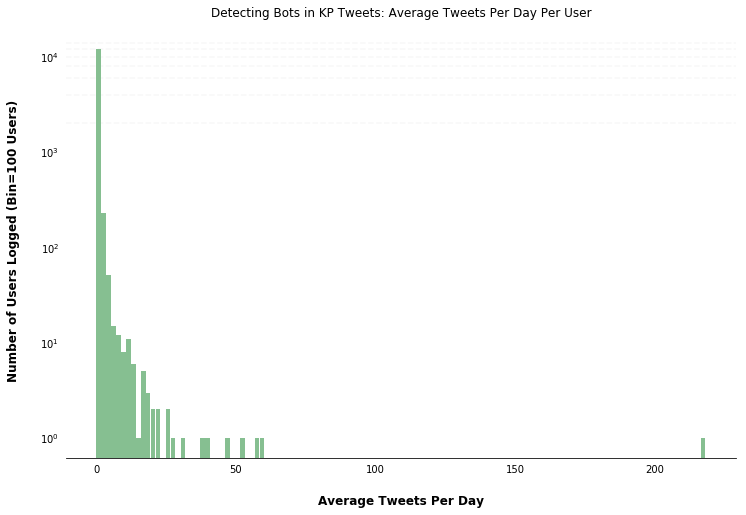

In [26]:
#Plot distribution of tweets per day in KP
ax = tweets.hist(column='tweets_per_day', bins=123, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Detecting Bots in KP Tweets: Average Tweets Per Day Per User")

    # Set x-axis label
    x.set_xlabel("Average Tweets Per Day", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of Users Logged (Bin=100 Users)", labelpad=20, weight='bold', size=12)
    x.set_yscale('log')
    
    plt.savefig("Histogram Tweets Per Day Per User.pdf", dpi=300, bbox_inches ="tight", transparent = True)

In [330]:
#Save potential bots that were removed
with open("potential_bots_based_on_tpd.pickle", "wb") as f:
    pickle.dump(five, f)

In [ ]:
#Importing std data
with open('std_of_kp_tweet_timing.pickle', "rb") as f:
    tweets = pickle.load(f)

In [ ]:
#Plotting distribution of sd's of tweet intervals for kp users
ax = tweets.hist(column='std', bins=123, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Detecting Bots in KP Tweets: Standard Deviation of Tweet Frequency Per Twitter User")

    # Set x-axis label
    x.set_xlabel("Standard Deviation of Tweets Per Twitter User", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of Twitter Users (Bin = 100 users)", labelpad=20, weight='bold', size=12)
    
    plt.savefig("Standard Deviation of Tweet Frequency Per User.pdf", dpi=300, bbox_inches ="tight", transparent = True)

In [ ]:
#Selecting and saving potential bots with sd's lower than 60 minutes
zero = tweets[tweets["std"] < 60]
with open("potential_bots_based_on_std.pickle", "wb") as f:
    pickle.dump(zero, f)

In [ ]:
#Removing all potential bots from kp data and saving
bots = pd.concat([std,tpd], ignore_index=True)
bots = bots[["user_id"]]
bots = bots["user_id"].to_list()
tweets = tweets[~tweets["user_id"].isin(bots)]

with open("kp_tweets_no_bots", "wb") as f:
    pickle.dump(tweets, f)